In [2]:
import cv2 as cv
import numpy as np
from ultralytics import YOLO

In [3]:
import sys
sys.path.append(r"C:\Users\jkoro\Desktop\Studia\asol_synthetic_data_generation")
print(sys.path)

['C:\\Users\\jkoro\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip', 'C:\\Users\\jkoro\\AppData\\Local\\Programs\\Python\\Python39\\DLLs', 'C:\\Users\\jkoro\\AppData\\Local\\Programs\\Python\\Python39\\lib', 'C:\\Users\\jkoro\\AppData\\Local\\Programs\\Python\\Python39', 'c:\\Users\\jkoro\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\asol-synthetic-data-generation-IaasQXjp-py3.9', '', 'c:\\Users\\jkoro\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\asol-synthetic-data-generation-IaasQXjp-py3.9\\lib\\site-packages', 'c:\\Users\\jkoro\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\asol-synthetic-data-generation-IaasQXjp-py3.9\\lib\\site-packages\\win32', 'c:\\Users\\jkoro\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\asol-synthetic-data-generation-IaasQXjp-py3.9\\lib\\site-packages\\win32\\lib', 'c:\\Users\\jkoro\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\asol-synthetic-data-generation-IaasQXjp-py3.9\\lib\\site-packages\\Pythonwin', 'C:\\Users\\jkoro\\Desktop\\Studia\\aso

In [4]:
model = YOLO(r"C:\Users\jkoro\Desktop\Studia\asol_synthetic_data_generation\weights\segmentation\poles\yolov8s-seg\best.pt")

In [99]:
test_img = cv.imread(r"C:\Users\jkoro\Desktop\Studia\asol_synthetic_data_generation\datasets\instance-segmentation\asol-instance-segmentation.v2-raw-dataset.yolov8\train\images\20241025_111643-mp4_frame_0_jpg.rf.d5a7913ad83214876913d2f118e09341.jpg")

In [79]:
results = model(test_img, conf=0.5)


0: 384x640 3 Poles, 301.8ms
Speed: 5.9ms preprocess, 301.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


In [154]:
xy = results[0].masks.xy


In [158]:
xy = xy[0].tolist()

In [170]:
from PIL import ImageDraw

img = Image.new('L', (w, h), 0)
ImageDraw.Draw(img).polygon(xy, outline=1, fill=255)
mask = np.array(img)

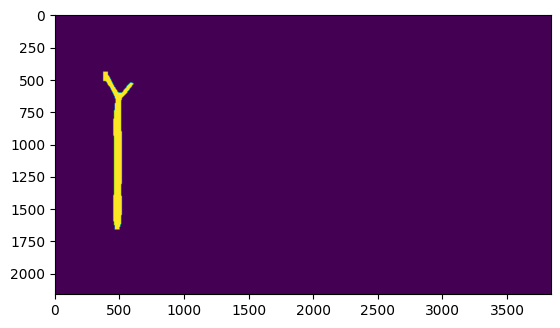

In [167]:
plt.imshow(mask)

In [80]:
mask = results[0].masks.data[0].cpu().numpy()

In [163]:
mask.shape, mask.dtype

((2160, 3840), dtype('uint8'))

In [82]:
mask = np.where(mask > 0.5, 255, 0).astype(np.uint8)  # Convert mask to binary

In [83]:
mask.shape

(384, 640)

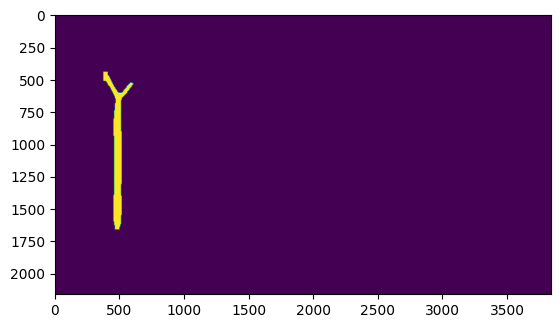

In [172]:
from PIL import Image
from matplotlib import pyplot as plt

plt.imshow(mask)

In [85]:
mask = cv.resize(mask, (test_img.shape[1], test_img.shape[0]), interpolation=cv.INTER_NEAREST).astype(np.uint8)

In [86]:
mask.shape
# mask = np.expand_dims(mask, -1)
# mask = np.squeeze(mask, axis=0)

(2160, 3840)

In [87]:
mask.shape

(2160, 3840)

In [88]:
mask = np.stack([mask, mask, mask], axis=-1)

In [89]:
test_img.shape, test_img.dtype, mask.shape, mask.dtype

((2160, 3840, 3), dtype('uint8'), (2160, 3840, 3), dtype('uint8'))

In [175]:
output = cv.addWeighted(test_img, 0.8, np.stack([mask, mask, mask], axis=-1), 0.5, 0)

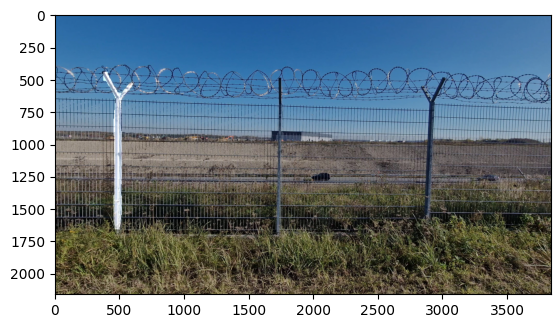

In [176]:
plt.imshow(output[..., ::-1])

In [102]:
img = test_img.copy()

In [111]:
img.shape, mask.shape, img.dtype, mask.dtype

((2160, 3840, 3), (2160, 3840, 3), dtype('uint8'), dtype('uint8'))

In [128]:
gray_mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)
gray_mask.shape, gray_mask.dtype

((2160, 3840), dtype('uint8'))

In [180]:
img = test_img.copy()

In [181]:
post_extracted = cv.bitwise_and(img, img, mask=mask)

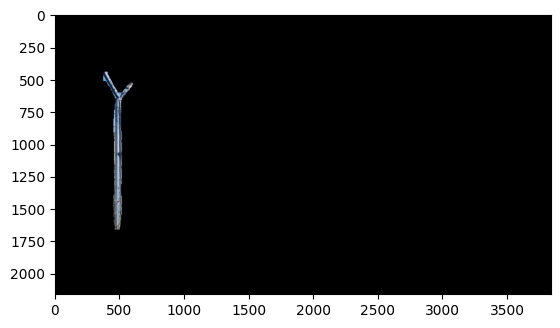

In [182]:
plt.imshow(post_extracted[..., ::-1])

In [183]:
angle = -30

In [184]:
h, w = post_extracted.shape[:2]

In [185]:
h, w

(2160, 3840)

In [186]:
M = cv.getRotationMatrix2D(center=(500, 1625), angle=angle, scale=1.0)

In [187]:

rotated_post = cv.warpAffine(
    post_extracted,
    M,
    (w, h),
    flags=cv.INTER_LINEAR,
    borderMode=cv.BORDER_CONSTANT,
    borderValue=(0, 0, 0),
)

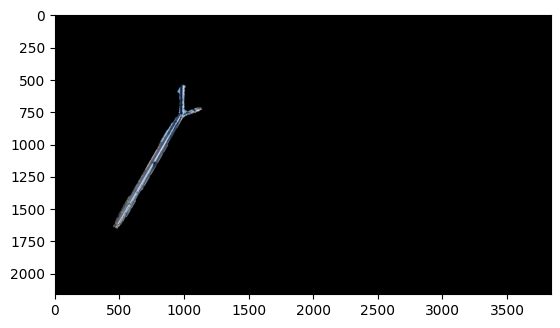

In [188]:
plt.imshow(rotated_post[..., ::-1])